## Standard libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [2]:
# This is the full dataset 
full_data = pd.read_excel("C:/Users/bodin/School/STAT 5001/project/baseballdata.xlsx")
full_data.head()

,date,game_num,day_of_week,away_team,away_league,away_game_num,home_team,home_league,home_game_num,away_score,...,home_7_name,home_7_pos,home_8_id,home_8_name,home_8_pos,home_9_id,home_9_name,home_9_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,D
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,D
2,18710506,0,Sat,CL1,NaN,2,RC1,NaN,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,D
3,18710508,0,Mon,CL1,NaN,3,CH1,NaN,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,D
4,18710509,0,Tue,BS1,NaN,2,TRO,NaN,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,D


## Manipulate Data

In [4]:
# Reduce data to include only games from the year 2000+
data_reduced = full_data[full_data['date'] > 20000101]     #yyyymmdd

# Only include variables specified in write-up
data = data_reduced[['away_AB', 'away_H', 'away_2B', 'away_3B',
             'away_HR', 'away_SH', 'away_SF', 'away_HBP', 
             'away_BB', 'away_IBB', 'away_K', 'away_SB', 'away_CS', 
             'away_GIDP', 'away_CI', 'away_score', 
             'home_AB', 'home_H', 'home_2B', 'home_3B', 
             'home_HR', 'home_SH', 'home_SF', 'home_HBP', 
             'home_BB', 'home_IBB', 'home_K', 'home_SB', 'home_CS', 
             'home_GIDP', 'home_CI', 'home_score']]

In [5]:
# Ensure no 'na' values
data = data.dropna()

# Add singles column as specified in our write-up
data['away_1B'] = data['away_H'] - data['away_2B'] - data['away_3B'] - data['away_HR']
data['home_1B'] = data['home_H'] - data['home_2B'] - data['home_3B'] - data['home_HR']

In [6]:
# Combine away and home data columns
data2 = pd.DataFrame()

data2['AB'] = pd.concat([data['away_AB'], data['home_AB']], ignore_index=True)
data2['H'] = pd.concat([data['away_H'], data['home_H']], ignore_index=True)
data2['1B'] = pd.concat([data['away_1B'], data['home_1B']], ignore_index=True)
data2['2B'] = pd.concat([data['away_2B'], data['home_2B']], ignore_index=True)
data2['3B'] = pd.concat([data['away_3B'], data['home_3B']], ignore_index=True)
data2['HR'] = pd.concat([data['away_HR'], data['home_HR']], ignore_index=True)
data2['SH'] = pd.concat([data['away_SH'], data['home_SH']], ignore_index=True)
data2['SF'] = pd.concat([data['away_SF'], data['home_SF']], ignore_index=True)
data2['HBP'] = pd.concat([data['away_HBP'], data['home_HBP']], ignore_index=True)
data2['BB'] = pd.concat([data['away_BB'], data['home_BB']], ignore_index=True)
data2['IBB'] = pd.concat([data['away_IBB'], data['home_IBB']], ignore_index=True)
data2['K'] = pd.concat([data['away_K'], data['home_K']], ignore_index=True)
data2['SB'] = pd.concat([data['away_SB'], data['home_SB']], ignore_index=True)
data2['CS'] = pd.concat([data['away_CS'], data['home_CS']], ignore_index=True)
data2['GIDP'] = pd.concat([data['away_GIDP'], data['home_GIDP']], ignore_index=True)
data2['CI'] = pd.concat([data['away_CI'], data['home_CI']], ignore_index=True)
data2['SCORE'] = pd.concat([data['away_score'], data['home_score']], ignore_index=True)

In [7]:
# Split into input and output variables
X = data2.drop('SCORE', axis=1)
y = data2['SCORE']

In [8]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Perform neural network regression

In [15]:
# Initialize model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(16,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer="adam", loss="mean_squared_error")

In [17]:
# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1401 - val_loss: 2.1870
Epoch 2/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1382 - val_loss: 2.1531
Epoch 3/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1370 - val_loss: 2.2352
Epoch 4/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1361 - val_loss: 2.2168
Epoch 5/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1350 - val_loss: 2.1557
Epoch 6/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1354 - val_loss: 2.1577
Epoch 7/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1366 - val_loss: 2.1447
Epoch 8/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1343 - val_loss: 2.1635
Epoch 9/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1356 - val_loss: 2.2470
Epoch 10/100
2207/2207 [==============================] - 3s 1ms/step - l

Epoch 80/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1103 - val_loss: 2.1543
Epoch 81/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1118 - val_loss: 2.1653
Epoch 82/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1130 - val_loss: 2.1574
Epoch 83/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1090 - val_loss: 2.1577
Epoch 84/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1114 - val_loss: 2.1644
Epoch 85/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1095 - val_loss: 2.1652
Epoch 86/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1087 - val_loss: 2.1556
Epoch 87/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1095 - val_loss: 2.2192
Epoch 88/100
2207/2207 [==============================] - 3s 1ms/step - loss: 2.1087 - val_loss: 2.1510
Epoch 89/100
2207/2207 [==============================] - 3s 1ms

In [18]:
# Make predictions
y_pred = model.predict(X_test)

690/690 [==============================] - 1s 880us/step


In [20]:
# Calculate mean squared error
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 2.1471051891038067
R-squared: 0.788724634416415


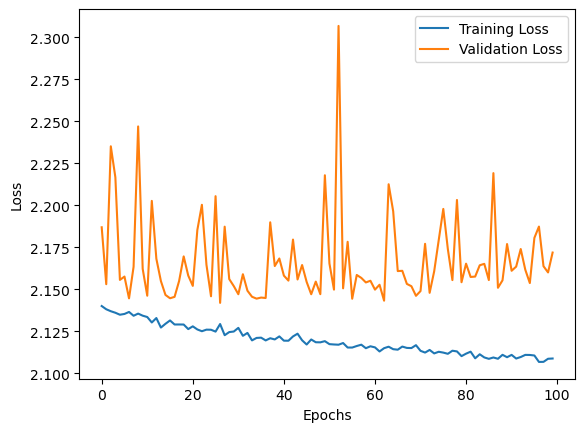

In [23]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Next step is to try a more advanced net and possibly adjust activation functions